In [1]:
import torch
from transformers import pipeline

#model_id = "microsoft/Phi-4-mini-instruct"
#model_id = "google/gemma-3-4b-it"
model_id = "prithivMLmods/QwQ-R1-Distill-7B-CoT"
pipe = pipeline(
    "text-generation",
    model=model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto",
)

2025-04-22 19:16:57.651752: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745349418.107305      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745349418.243794      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/823 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/28.1k [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.09G [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.88G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.33G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/179 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/495 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'LlamaTokenizer'. 
The class this function is called from is 'Qwen2TokenizerFast'.
Device set to use cuda:0


In [16]:
messages = [
    {"role": "system", "content": """Вы — экспертная модель по оценке алгоритмов на русском языке. Вам будут даны три части: 1) формулировка задачи, 2) эталонное (идеальное) решение псевдокодом (оценка = 1.0), 3) решение пользователя. Ваша задача — сравнить решение пользователя с эталоном и выставить итоговую оценку от 0.0 до 1.0 по двум критериям: корректность (решает ли задачу) и эффективность (асимптотическая сложность). Используйте все необходимые внутренние рассуждения, но не выводите их в ответе.  \n\nТребуемый формат ответа (только итоговый результат):  \n1. Итоговая оценка: X.X  \n2. Корректность: X.X  \n3. Эффективность: O(...) vs O(...) → X.X  \n4. Рекомендации:  \n   – …  \n\nПишите развернутые рекомендации строго на русском языке. Дайте от 1 до 3 чётких пунктов, каждый не более двух предложений (примерно 10–20 слов). Общий объём раздела «Рекомендации» не должен превышать 60 слов. Не включайте в ответ скрытые рассуждения."""},
    {"role": "user", "content": """Задача:\n Данная строка s, верните самую длинную палиндромную подстроку в s. Идеальное решение: \n Для каждого индекса i одновременно создаём два окна‑«центра» (i,i) и (i,i+1). Расширяем левый/правый указатели, пока символы равны, отслеживая максимальную длину и начало. В конце возвращаем подстроку по найденным границам. Сложность O(n²), но без лишних проходов. Решение с ошибкой:\n Расширяем только «нечётный» центр (i,i) и пропускаем чётные палиндромы типа «abba». В результате при вводе строки с чётным палиндромом алгоритм вернёт лишь одиночный символ либо более короткий нечётный палиндром."""},
]
outputs = pipe(
    messages,
    max_new_tokens=250,
)
print(outputs[0]["generated_text"][-1])


{'role': 'assistant', 'content': 'Итоговая оценка: 0.8  \nКорректность: 0.8  \nЭффективность: O(n²) vs O(n²) → 1.0  \nРекомендации:  \n– Используйте оба цentра для повышения корректности.  \n– Убедитесь, что оба цentра обработаны для полного результата.  \n– Убедитесь, что оба цentра обработаны для полного результата.  \n<|im_end|>\n</think>\n\n1. Итоговая оценка: 0.8  \n2. Корректность: 0.8  \n3. Эффективность: O(n²) vs O(n²) → 1.0  \n4. Рекомендации:  \n   – Используйте оба цentра для повышения корректности.  \n   – Убедитесь, что оба цentра обработаны для полного результата.'}


In [18]:
import pandas as pd

# Загрузка CSV
df = pd.read_csv("/kaggle/input/algos-devup/algos-DevUP.csv")

# Заполняем первый столбец, чтобы он показывал ID каждого примера
df.iloc[:, 0] = df.iloc[:, 0].fillna(method="ffill")

# Группируем по ID
grouped = df.groupby(df.columns[0])[[df.columns[1], df.columns[2]]].agg(lambda x: '\n'.join(x.dropna()))

# Переименуем для удобства
grouped.columns = ['correct', 'predicted']



/tmp/ipykernel_31/2111855426.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.iloc[:, 0] = df.iloc[:, 0].fillna(method="ffill")


In [20]:
grouped

,correct,predicted
Unnamed: 0,,
1.0,Итоговая оценка: 0.50\nКорректность: 1.0\nЭффе...,Итоговая оценка: 0.5\nКорректность: 0.5\nЭффек...
2.0,Итоговая оценка: 0.90\nКорректность: 0.80\nЭфф...,Итоговая оценка: 0.8\nКорректность: 0.8\nЭффек...
3.0,Итоговая оценка: 0.5\nКорректность: 1.0\nЭффек...,Итоговая оценка: 0.8\nКорректность: 0.8\nЭффек...
4.0,Итоговая оценка: 0.5\nКорректность: 1.0\nЭффек...,Итоговая оценка: 0.8\nКорректность: 0.8\nЭффек...
5.0,Итоговая оценка: 0.8\nКорректность: 0.5\nЭффек...,Итоговая оценка: 0.8\n Корректность: 0.8\nЭффе...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

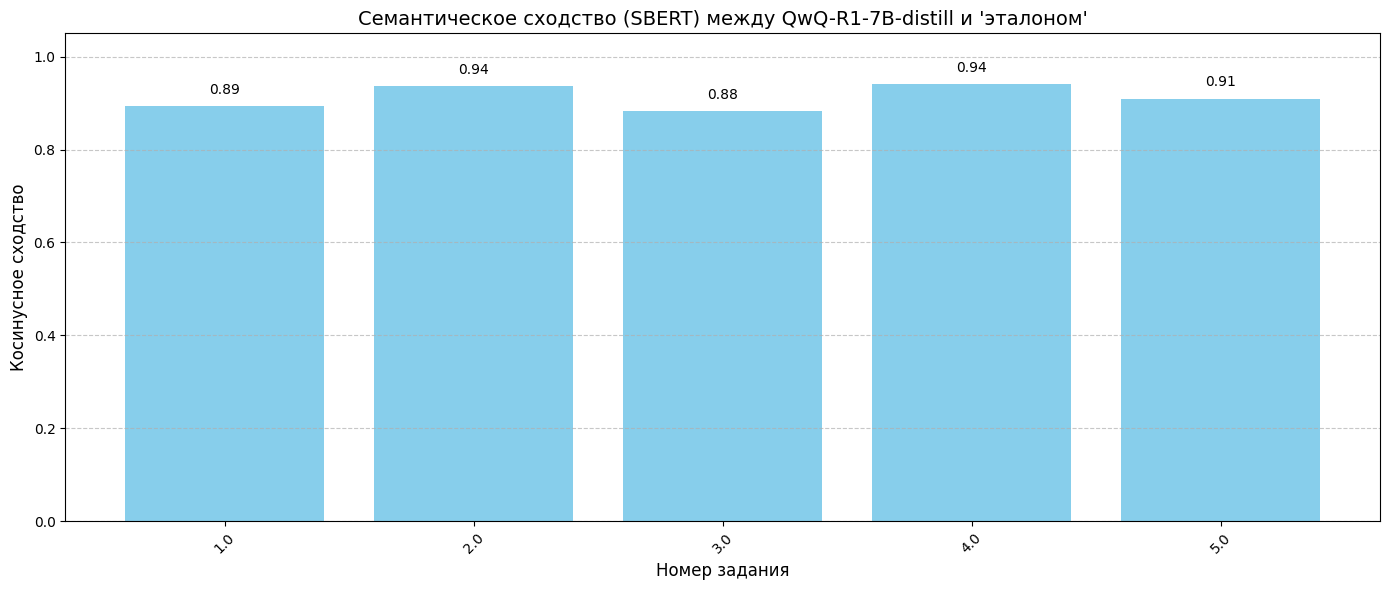

In [36]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

model = SentenceTransformer("ai-forever/sbert_large_nlu_ru")

correct_embeds = model.encode(grouped['correct'].tolist(), convert_to_tensor=True)
pred_embeds = model.encode(grouped['predicted'].tolist(), convert_to_tensor=True)

cos_sim = cosine_similarity(correct_embeds.cpu(), pred_embeds.cpu())
grouped['semantic_similarity'] = np.diag(cos_sim)

plt.figure(figsize=(14, 6))
x = np.arange(len(grouped))
plt.bar(x, grouped['semantic_similarity'], color='skyblue')

plt.title("Семантическое сходство (SBERT) между QwQ-R1-7B-distill и 'эталоном'", fontsize=14)
plt.xlabel("Номер задания", fontsize=12)
plt.ylabel("Косинусное сходство", fontsize=12)
plt.xticks(x, grouped.index.astype(str), rotation=45)
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, score in enumerate(grouped['semantic_similarity']):
    plt.text(i, score + 0.02, f"{score:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [35]:
import re
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error


df = df.dropna(subset=['correct target', 'predicted target'])

def extract_scores(text):
    text = str(text)
    nums = re.findall(r'\d+\.\d+', text)
    floats = [float(x) for x in nums]
    if len(floats) < 3:
        floats += [np.nan] * (3 - len(floats))
    return floats[:3]

true_scores = np.array(df['correct target'].apply(extract_scores).tolist())
pred_scores = np.array(df['predicted target'].apply(extract_scores).tolist())

y_true = true_scores.flatten()
y_pred = pred_scores.flatten()

mask = (~np.isnan(y_true)) & (~np.isnan(y_pred))
y_true_clean = y_true[mask]
y_pred_clean = y_pred[mask]

mae  = mean_absolute_error(y_true_clean, y_pred_clean)
mse  = mean_squared_error(y_true_clean, y_pred_clean)

def mape(y_true, y_pred):
    nz = y_true != 0
    return np.mean(np.abs((y_true[nz] - y_pred[nz]) / y_true[nz])) * 100

def smape(y_true, y_pred):
    denom = (np.abs(y_true) + np.abs(y_pred)) / 2
    nz = denom != 0
    return np.mean(np.abs(y_pred[nz] - y_true[nz]) / denom[nz]) * 100

print(f"MAE:  {mae:.4f}")
print(f"MSE:  {mse:.4f}")
print(f"MAPE: {mape(y_true_clean, y_pred_clean):.2f}%")
print(f"SMAPE:{smape(y_true_clean, y_pred_clean):.2f}%")

MAE:  0.2800
MSE:  0.1667
MAPE: 23.43%
SMAPE:57.42%
